# CLASSIFICATION USING ANN AND SVM

In [70]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [71]:
data = pd.read_csv('Churn_Dataset.csv')

data.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [73]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [74]:
# Checking if our dataset contains any NULL values

data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# DATA PREPROCESSING

In [75]:
# Removing the unnecassary features from the dataset

data = data.drop('Surname', axis=1)
data = data.drop('RowNumber', axis=1)
data = data.drop('CustomerId', axis=1)



In [76]:
# splitting the dataset into x(independent variables) and y(dependent variables)

# Independent variables
X = data.drop('Exited', axis=1)

# Dependent variable
y = data['Exited']

X.head(), y.head()

(   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
 0          619    France  Female   42       2       0.00              1   
 1          608     Spain  Female   41       1   83807.86              1   
 2          502    France  Female   42       8  159660.80              3   
 3          699    France  Female   39       1       0.00              2   
 4          850     Spain  Female   43       2  125510.82              1   
 
    HasCrCard  IsActiveMember  EstimatedSalary  
 0          1               1        101348.88  
 1          0               1        112542.58  
 2          1               0        113931.57  
 3          0               0         93826.63  
 4          1               1         79084.10  ,
 0    1
 1    0
 2    1
 3    0
 4    0
 Name: Exited, dtype: int64)

In [77]:
# Encoding Categorical variables into numerical variables
# One Hot Encoding
"""
from sklearn.preprocessing import OneHotEncoder

# Assuming 'Geography' and 'Gender' are the only categorical variables that need to be one-hot encoded

# Create the OneHotEncoder object
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid dummy variable trap

# Select the categorical data for transformation
categorical_data = X[['Geography', 'Gender']]

# Fit and transform the categorical data
categorical_data_encoded = encoder.fit_transform(categorical_data)

# Create a DataFrame with the encoded variables
# Generate column names for the one-hot encoded variables
categories = encoder.categories_
categorical_columns = [f'{col}_{cat}' for col, cats in zip(['Geography', 'Gender'], categories) for cat in cats[1:]]

encoded_df = pd.DataFrame(categorical_data_encoded, columns=categorical_columns)

# Concatenate the encoded df with the original X and drop the original categorical columns
X_encoded = pd.concat([X.drop(['Geography', 'Gender'], axis=1), encoded_df], axis=1)

X_encoded.head()
"""


"\nfrom sklearn.preprocessing import OneHotEncoder\n\n# Assuming 'Geography' and 'Gender' are the only categorical variables that need to be one-hot encoded\n\n# Create the OneHotEncoder object\nencoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid dummy variable trap\n\n# Select the categorical data for transformation\ncategorical_data = X[['Geography', 'Gender']]\n\n# Fit and transform the categorical data\ncategorical_data_encoded = encoder.fit_transform(categorical_data)\n\n# Create a DataFrame with the encoded variables\n# Generate column names for the one-hot encoded variables\ncategories = encoder.categories_\ncategorical_columns = [f'{col}_{cat}' for col, cats in zip(['Geography', 'Gender'], categories) for cat in cats[1:]]\n\nencoded_df = pd.DataFrame(categorical_data_encoded, columns=categorical_columns)\n\n# Concatenate the encoded df with the original X and drop the original categorical columns\nX_encoded = pd.concat([X.drop(['Geography', 'Gender'], a

In [78]:
#split
X_encoded=pd.get_dummies(X, columns=["Gender", "Geography"])
print(X_encoded)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Gender_Female  Gender_Male  \
0                  1        101348.88           True        False   
1        

In [79]:
# splitting the data into training and testing set

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Output the shapes of the resulting data splits
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((8000, 13), (2000, 13), (8000,), (2000,))

In [80]:
# Feature Scaling 
# Only on Independent Variable to convert them into values ranging from -1 to +1

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
"""
# Create a StandardScaler object
sc = StandardScaler()

# Fit the scaler to the training data and transform both the training and testing independent variables
X_train_scaled = sc.fit_transform(x_train)
X_test_scaled = sc.transform(x_test)

# The scaling is only applied to the independent variables to avoid information leakage
# from the dependent variable 'y'

# Display the first few entries of the scaled training data
X_train_scaled[:4]
"""

sc = MinMaxScaler(feature_range=(-1, 1))
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# LOGISTIC REGRESSION

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.81125
Testing Accuracy : 0.81
[[1537   70]
 [ 310   83]]


# SUPPORT  VECTOR MACHINE

In [82]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.837875
Testing Accuracy : 0.841
[[1591   16]
 [ 302   91]]


In [83]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
print(cvs)

[0.835   0.8375  0.8275  0.8175  0.8425  0.82    0.845   0.82875 0.84125
 0.83625]


# MULTILAYER ANN

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Initialising ANN
input_shape = x_train.shape[1:]

# define the keras model
model = Sequential()
model.add(Dense(6, input_shape=(input_shape), activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [85]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(x_train, y_train, validation_data = (x_test,y_test), epochs=50, batch_size=10)

Epoch 1/50
800/800 [==============================] - 3s 2ms/step - loss: 0.4979 - accuracy: 0.7914 - val_loss: 0.4589 - val_accuracy: 0.8040
Epoch 2/50
800/800 [==============================] - 2s 2ms/step - loss: 0.4668 - accuracy: 0.7947 - val_loss: 0.4422 - val_accuracy: 0.8040
Epoch 3/50
800/800 [==============================] - 2s 2ms/step - loss: 0.4534 - accuracy: 0.7961 - val_loss: 0.4282 - val_accuracy: 0.8045
Epoch 4/50
800/800 [==============================] - 2s 3ms/step - loss: 0.4428 - accuracy: 0.7994 - val_loss: 0.4179 - val_accuracy: 0.8080
Epoch 5/50
800/800 [==============================] - 2s 2ms/step - loss: 0.4338 - accuracy: 0.8060 - val_loss: 0.4100 - val_accuracy: 0.8115
Epoch 6/50
800/800 [==============================] - 2s 2ms/step - loss: 0.4272 - accuracy: 0.8106 - val_loss: 0.4072 - val_accuracy: 0.8155
Epoch 7/50
800/800 [==============================] - 2s 2ms/step - loss: 0.4221 - accuracy: 0.8148 - val_loss: 0.4002 - val_accuracy: 0.8235
Epoch 

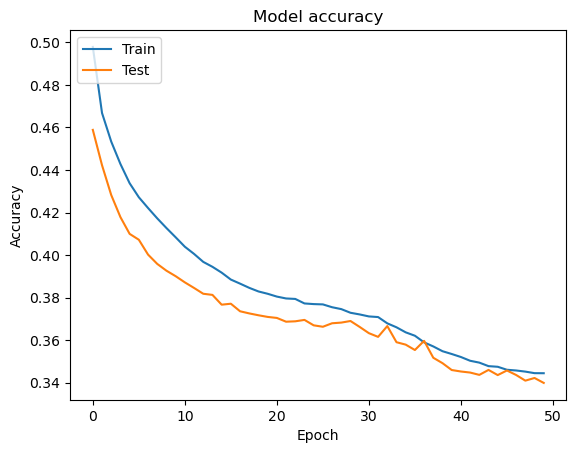

In [86]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [87]:
'''
predicting if the costumer having following information will leave the bank or not ?

Geography : france
Age = 50
Credit score = 850
Tenure = 4
Balance = 150000
Number of Products = 5
Gender = Female
Has Credit Card = yes
Is Active Member = yes
Estimated Salary = 85000
'''

new_prediction = model.predict(sc.transform(np.array([[850, 50, 4, 150000, 5, 1, 1, 85000, 1, 0, 1, 0, 0]]))) 

new_prediction = (new_prediction > 0.5 )
print(new_prediction)

c:\ProgramData\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 217ms/step
[[ True]]
